In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
%matplotlib inline

In [4]:
file_path = "data/2015_Air_quality_in_northern_Taiwan.csv"
df = pd.read_csv(file_path, parse_dates=["time"],index_col="time")
df.head()

C:\Users\Chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (10,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PH_RAIN,PM10,PM2.5,RAINFALL,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
time,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,Banqiao,16,2.1,0.79,0.14,1.2,16,17,37,NR,177,78x,NR,NR,57,12,2.2,0,69,69,4.7,4.2
2015-01-01 01:00:00,Banqiao,16,2.1,0.8,0.15,1.3,16,17,36,NR,178,77x,NR,NR,57,11,2.2,0,67,65,4,4
2015-01-01 02:00:00,Banqiao,16,2.1,0.71,0.13,1,13,14,38,NR,163,72x,NR,NR,57,8,2.2,0,63,53,3.7,3.5
2015-01-01 03:00:00,Banqiao,15,2,0.66,0.12,0.8,11,12,39,NR,147,65x,NR,NR,58,6.5,2.2,0,63,63,4.1,3.3
2015-01-01 04:00:00,Banqiao,15,2,0.53,0.11,0.6,10,11,38,NR,131,56x,NR,NR,58,5.5,2.1,0,69,67,3,3.1


In [5]:
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: pd.to_numeric(x,errors='coerce'),axis=1).copy()

In [6]:
df.station.unique()

array(['Banqiao', 'Cailiao', 'Datong', 'Dayuan', 'Guanyin', 'Guting',
       'Keelung', 'Linkou', 'Longtan', 'Pingzhen', 'Sanchong', 'Shilin',
       'Songshan', 'Tamsui', 'Taoyuan', 'Tucheng', 'Wanhua', 'Wanli',
       'Xindian', 'Xinzhuang', 'Xizhi', 'Yangming', 'Yonghe', 'Zhongli',
       'Zhongshan'], dtype=object)

In [7]:
#Drops unneeded rain metric
#df = df.drop('PH_RAIN','PM10','PM2.5','RAINFALL',1)
df = df.drop(df.columns[[9, 10, 11, 12, 13]], axis=1)

In [36]:
#len(subset)
pol = "CO"
# stations = ['Xinzhuang', 'Sanchong', 'Linkou', 'Wanhua']
stations = ["Guanyin","Zhongli","Linkou","Sanchong","Zhongshan","Songshan"]
subset = df[["station", pol]]
subset = subset.pivot(columns="station", values=pol).fillna(method='ffill')
subset = subset[stations]
subset.shape

(8760, 6)

In [37]:
model = sm.tsa.VAR(subset)
order = model.select_order(30)["aic"]

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -16.75       -16.74    5.325e-08       -16.75
1        -22.77       -22.74    1.290e-10       -22.76
2        -23.09       -23.03    9.346e-11       -23.07
3        -23.13      -23.04*    9.034e-11       -23.10
4        -23.15       -23.03    8.860e-11       -23.11
5        -23.17       -23.02    8.669e-11       -23.12
6        -23.18       -23.00    8.553e-11       -23.12
7        -23.20       -22.99    8.404e-11       -23.13
8        -23.21       -22.98    8.281e-11       -23.13
9        -23.25       -22.98    7.990e-11       -23.16
10       -23.27       -22.97    7.842e-11       -23.17
11       -23.29       -22.96    7.711e-11       -23.17
12       -23.29       -22.94    7.645e-11       -23.17
13       -23.30       -22.92    7.604e-11       -23.17
14       -23.33       -22.92    7.352e-11       -23.19
15       -

# Impulse Analysis of Taiwan Air Polution

Charlie Edelson & Chris Leonard

## Data Origin
- Origins from Kaggle 
- 25 Air and Rain Sampling Stations spread over Taipai, Taiwan Metropolitan Area Through 2015
- Readings were taken every hour
- Carbon Monoxide (CO) is a major air polutant which is often released as a biproduct of engine exaust 


## Cleaning
- Data was well documented with invalidated points marked
- Forward fill was used to fill NAs


## Sampling Stations
<img src="images/Taipai_Emission_Station.png">

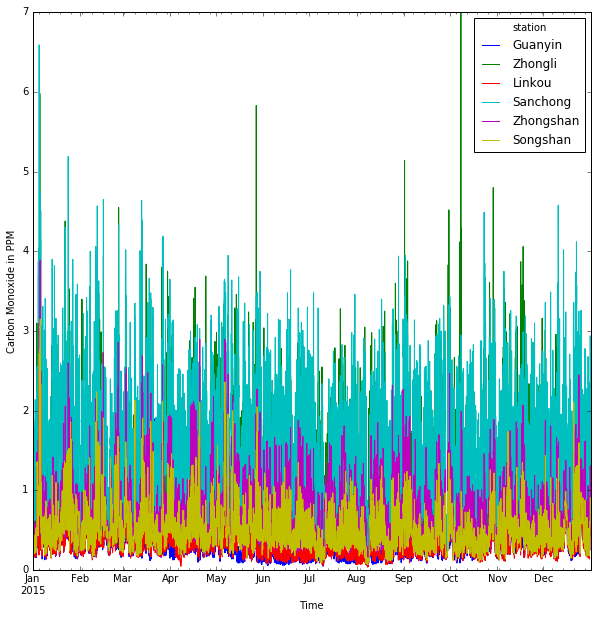

In [58]:
timeseries, axes = plt.subplots()
subset.plot(figsize = (10,10),ylim=(0,7), ax=axes,title="")
axes.set_ylabel("Carbon Monoxide in PPM")
axes.set_xlabel("Time")

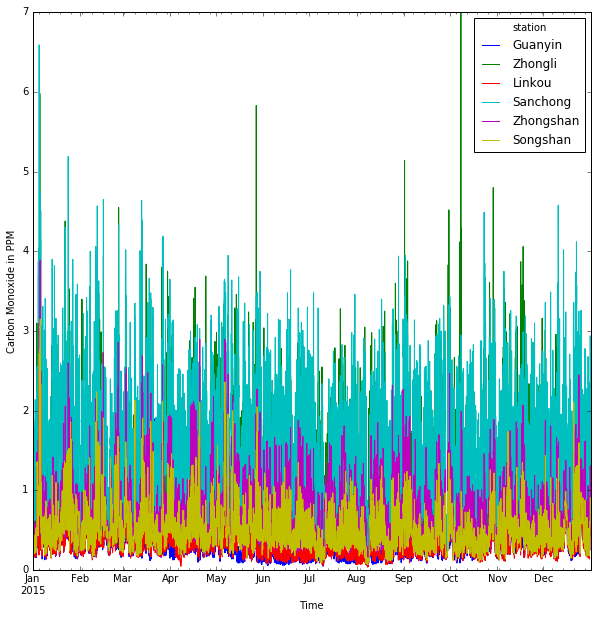

In [59]:
timeseries

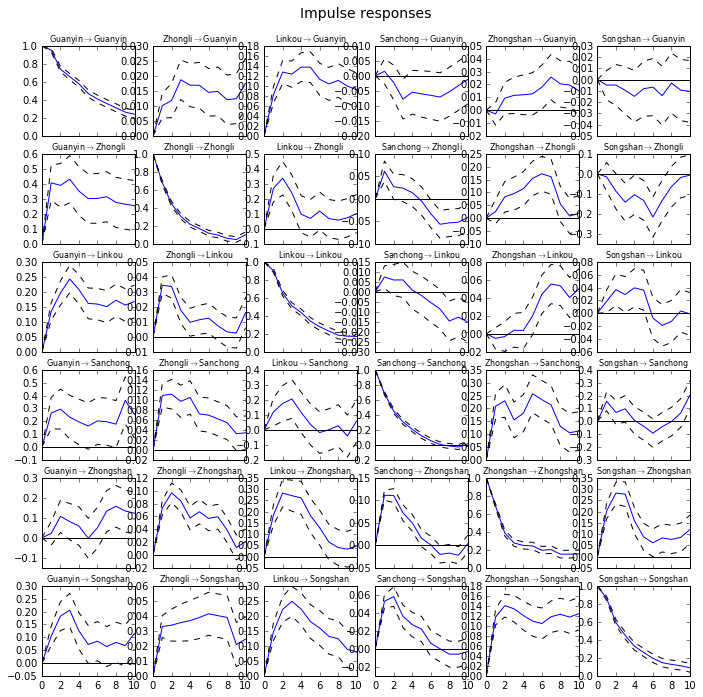

In [80]:
# Impulse Graphic 
results = model.fit(order)
irf = results.irf(10)
#fig, axes = plt.subplots(figsize = (2,2))
plot_params ={"ax": axes}
subplot_params = {"fontsize" : 8,"labelsize" : 2}
irf.plot(orth=False,plot_params=plot_params,subplot_params=subplot_params)
plt.savefig("images/impulse.png")

<img src="images/impulse.png" width=550 height=550>

## Future Implimentations 
- Directional wind impulse investigation
- Impulse between varying airborn polutants
- Relationship between airborn polutants and rain fall 

## References
https://www.kaggle.com/nelsonchu/air-quality-in-northern-taiwan



Initial LogLikelihood 

In [ ]:
def find_var_params(df, metric):
    """
    This function will select var_p stuff
    """
    models = {}
    for i in df.Binned_Wind.unique():
        df_i = df.loc[df.Binned_Wind == 1]
        df_i = df_i[['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3',]]
        model = sm.tsa.VAR(df_i)
        order = model.select_order(30)[metric]
        models[i] = model.fit(order)

    return models

In [ ]:
train = Taoyuan.iloc[:int(Taoyuan.shape[0] / 2), :]
test = Taoyuan.iloc[int(Taoyuan.shape[0] / 2):, :]
find_var_params(train, "aic")